In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("data/slr06.csv")
df.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [3]:
raw_X = df["X"].values.reshape(-1, 1)
y = df["Y"].values

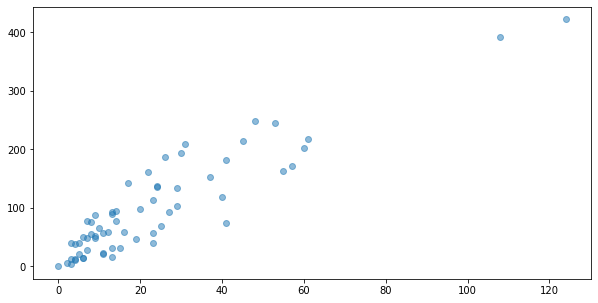

In [4]:
plt.figure(figsize=(10,5))
plt.plot(raw_X,y, 'o', alpha=0.5)

In [5]:
raw_X[:5], y[:5]

(array([[108],
        [ 19],
        [ 13],
        [124],
        [ 40]], dtype=int64),
 array([392.5,  46.2,  15.7, 422.2, 119.4]))

In [6]:
np.ones((len(raw_X),1))[:3]

array([[1.],
       [1.],
       [1.]])

In [7]:
X = np.concatenate( (np.ones((len(raw_X),1)), raw_X ), axis=1)
X[:5]

array([[  1., 108.],
       [  1.,  19.],
       [  1.,  13.],
       [  1., 124.],
       [  1.,  40.]])

In [8]:
w = np.random.normal((2,1)) 
# w = np.array([5,3])
w

array([0.94381085, 0.84616619])

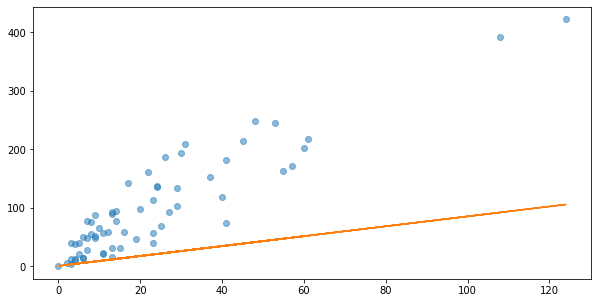

In [9]:
plt.figure(figsize=(10,5))
y_predict = np.dot(X, w)
plt.plot(raw_X,y,"o", alpha=0.5)
plt.plot(raw_X,y_predict)

In [10]:
def hypothesis_function(X, theta):
    return X.dot(theta)

In [11]:
h = hypothesis_function(X,w)

In [12]:
def cost_function(h, y):
    return (1/(2*len(y))) * np.sum((h-y)**2)

In [13]:
h = hypothesis_function(X,w)
cost_function(h, y)

5425.691747540101

In [14]:
def gradient_descent(X, y, w, alpha, iterations):
    theta = w
    m = len(y)
    
    theta_list = [theta.tolist()]
    cost = cost_function(hypothesis_function(X, theta), y)
    cost_list = [cost]

    for i in range(iterations):
        t0 = theta[0] - (alpha / m) * np.sum(np.dot(X, theta) - y)
        t1 = theta[1] - (alpha / m) * np.sum((np.dot(X, theta) - y) * X[:,1])
        theta = np.array([t0, t1])
        
        if i % 10== 0:
            theta_list.append(theta.tolist())
            cost = cost_function(hypothesis_function(X, theta), y)
            cost_list.append(cost)


    return theta, theta_list, cost_list

In [15]:
iterations = 10000
alpha = 0.001

theta, theta_list, cost_list = gradient_descent(X, y, w, alpha, iterations)
cost = cost_function(hypothesis_function(X, theta), y)

print("theta:", theta)
print('cost:', cost_function(hypothesis_function(X, theta), y))

theta: [19.87347484  3.41643647]
cost: 625.3746670977212


In [16]:
theta_list = np.array(theta_list)

In [17]:
cost_list[:5]

[5425.691747540101,
 734.3950519604158,
 715.5050573295674,
 714.5982861243938,
 713.7006372612159]

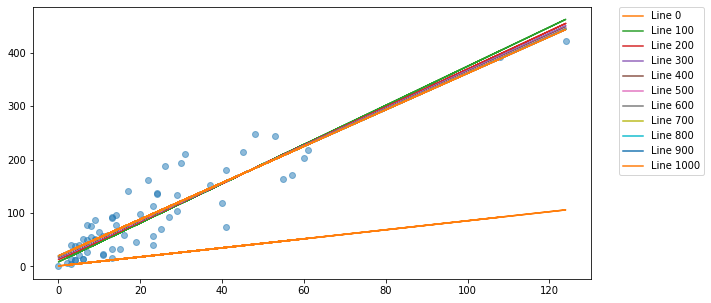

In [18]:
plt.figure(figsize=(10,5))

y_predict_step= np.dot(X, theta_list.transpose())

y_predict_step
plt.plot(raw_X,y,"o", alpha=0.5)
for i in range (0,len(cost_list),100):
    plt.plot(raw_X,y_predict_step[:,i], label='Line %d'%i)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

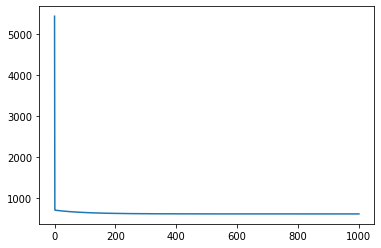

In [19]:
plt.plot(range(len(cost_list)), cost_list);